* BASED ON THE CHEMICALS AND MINERALS WHEATHER THE WATER IS "SAFE (or) NOT"

## IMPORTING ALL THE LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

## READ THE DATASET

In [2]:
data = pd.read_csv(r"C:\Users\HP\Downloads\waterQuality1.csv")

In [3]:
data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
data[["is_safe"]].value_counts()

is_safe
0          7084
1           912
#NUM!         3
dtype: int64

* IN "IS_SAFE" COLUMN '2 CLASSES' ARE THERE BUT 3 ROWS ARE CONTAINS UNNESSESSARY VALUES

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
data.loc[(data["ammonia"]=="#NUM!") & (data["is_safe"]=="#NUM!")]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


* IN "ammonia" AND "is_safe" columns ARE CONTAINS FEW UNNESSESARY VALUES IN SAME ROW  SO WE CAN DELET THAT ROWS

In [7]:
data.drop(data.loc[data["ammonia"]=="#NUM!"].index,inplace=True)

* SUCCESSFULLY DROPPED THAT 3 ROWS 
* ALSO WE NEED TO CHANGE THE DATA TYPE TO 'FLOAT (OR) INT'

In [20]:
data["ammonia"] = data["ammonia"].astype(float)
data["is_safe"] = data["is_safe"].astype(float)

* SUCCESSFULLY CHANGED THE DATATYPE TO 'FLOAT'

In [9]:
data['ammonia'].isnull().sum()

0

In [10]:
data.duplicated().sum()

0

* IN THIS DATASET 'NO DUPLICATES AND NULL VALUES'

## SEPARATES THE DATASET XI'S WITH YI'S

In [21]:
fv = data.drop(['is_safe'],axis=1)
cv = data[['is_safe']]

## SPLITTING THE DTASET INTO D_TRAIN & D_TEST

In [22]:
x_train,x_test,y_train,y_test = train_test_split(fv,cv,test_size=0.3,random_state=1)

In [23]:
len(x_train.columns)

20

## BUILDING THE MULTIPLE LAYERED NEURON MODEL

In [24]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim = 20,kernel_initializer="he_uniform"))
model.add(Dense(8,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(4,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 8)                 88        
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


* IN THIS MODEL TOTALLY 339 TRAINABLE PARRAMETERS ARE THERE (23-BIASES,316-WEIGHTS).

## COMPILING THE MODEL

In [25]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

## TRAINING THE MODEL WITH 100 EPOCHS, OPTIMIZER=ADAM

In [26]:
a = model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
448/448 [==============================] - 3s 3ms/step - loss: 0.3758 - accuracy: 0.8872 - val_loss: 0.3546 - val_accuracy: 0.8768
Epoch 2/100
448/448 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8876 - val_loss: 0.3207 - val_accuracy: 0.8768
Epoch 3/100
448/448 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.8876 - val_loss: 0.2957 - val_accuracy: 0.8768
Epoch 4/100
448/448 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.8876 - val_loss: 0.2756 - val_accuracy: 0.8768
Epoch 5/100
448/448 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.8876 - val_loss: 0.2642 - val_accuracy: 0.8768
Epoch 6/100
448/448 [==============================] - 1s 3ms/step - loss: 0.2550 - accuracy: 0.8973 - val_loss: 0.2619 - val_accuracy: 0.8884
Epoch 7/100
448/448 [==============================] - 1s 3ms/step - loss: 0.2501 - accuracy: 0.9022 - val_loss: 0.2544 - val_accuracy: 0.8920

Epoch 58/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1721 - accuracy: 0.9354 - val_loss: 0.1979 - val_accuracy: 0.9330
Epoch 59/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1706 - accuracy: 0.9334 - val_loss: 0.1955 - val_accuracy: 0.9321
Epoch 60/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1707 - accuracy: 0.9363 - val_loss: 0.1880 - val_accuracy: 0.9286
Epoch 61/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1698 - accuracy: 0.9392 - val_loss: 0.1923 - val_accuracy: 0.9312
Epoch 62/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1682 - accuracy: 0.9363 - val_loss: 0.1906 - val_accuracy: 0.9330
Epoch 63/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1700 - accuracy: 0.9363 - val_loss: 0.1929 - val_accuracy: 0.9268
Epoch 64/100
448/448 [==============================] - 1s 2ms/step - loss: 0.1658 - accuracy: 0.9399 - val_loss: 0.1904 - val_accuracy:

## PRIDICTING THE MODEL WITH X_TRAIN

In [27]:
p = model.predict(x_train)

175/175 [==============================] - 2s 5ms/step


In [28]:
pp=np.where(p>0.5,1,0).flatten()

In [29]:
pp

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
accuracy_score(pp,y_train)

0.944255851348937

* FINALLY 94% OF ACCURATLLY MY MODEL IS WORKS.

In [31]:
s = pd.DataFrame(pp)

## PREDICTING THE MODEL WITH X_TEST

In [32]:
p1 = model.predict(x_test)

75/75 [==============================] - 1s 6ms/step


In [33]:
pp1 = np.where(p1>0.5,1,0)
accuracy_score(pp1,y_test)

0.9295539808253439

* FINALLY 93% OF ACCURATLLY MY MODEL IS WORKS ON UNSEENED DATA.

In [34]:
model.evaluate(x_test,y_test)

75/75 [==============================] - 2s 6ms/step - loss: 0.2037 - accuracy: 0.9296


[0.20374047756195068, 0.9295539855957031]

* NOTE:- IN EACH MODEL SOME ERROR IS THERE THAT MODEL IS CALLED AS "IRREDUSABLE ERROR"

In [35]:
trl = a.history['loss']
cvl = a.history['val_loss']

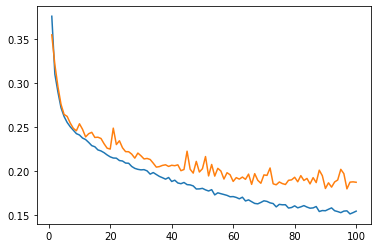

In [36]:
plt.plot(range(1,101),trl,label = 'Training loss')
plt.plot(range(1,101),cvl,label = 'cross_valloss')